# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: Karla Salazar Chavarría

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [3]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

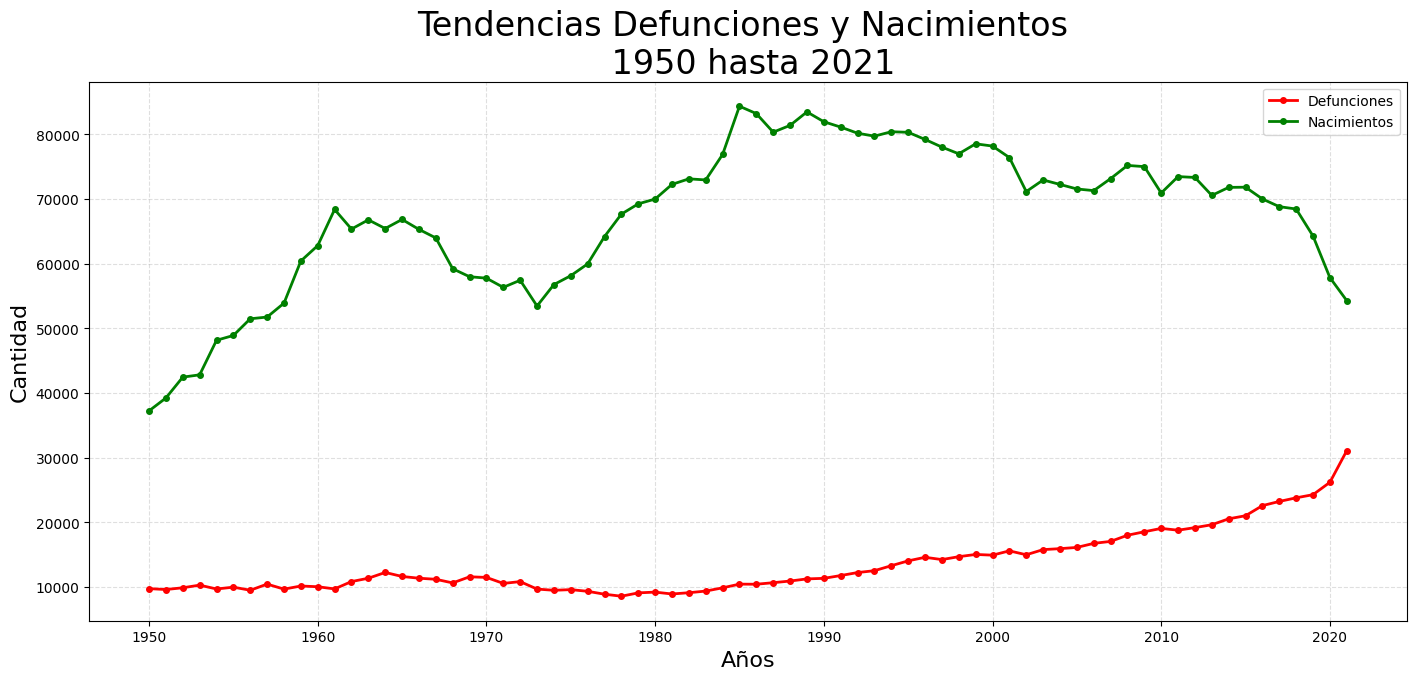

In [4]:
import matplotlib.pyplot as plt



plt.rcParams["figure.figsize"] = (17, 7)

annos = df['Año']
nacimientos = df['Nacimientos']
defunciones = df['Defunciones']

#plt.plot(annos, nacimientos)
plt.title(f'Tendencias Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}',fontsize=24)


plt.plot(df['Año'],df['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df['Año'],df['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

#plt.plot(nacimientos, label="nacimientos", color="blue", ls="-", lw="1")
#plt.plot(defunciones, label="defunciones", color="red", ls="-", lw="1")

#https://seaborn.pydata.org/   librería para marcar tendencias

plt.grid(linestyle='--', alpha = 0.4)
plt.xlabel('Años',fontsize=16)
plt.ylabel('Cantidad',fontsize=16)

plt.legend()
plt.show()


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [21]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]




,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [6]:
# Filtrar datos desde el año 2010
#df_filtrado = df[df['Año']>=2010]

df_filtrado = df.loc[df['Año'] >= 2010]

df_filtrado




,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [7]:
# total_nacimientos
# total_defunciones 

tot_nacimientos = df['Nacimientos'].sum()
tot_defunciones = df['Defunciones'].sum()
print('Total nacimientos: ', tot_nacimientos)
print('Total defunciones: ', tot_defunciones)



Total nacimientos:  4846207
Total defunciones:  975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [8]:
#Saldo Poblacional

df['Saldo poblacional'] = df['Nacimientos'] - df['Defunciones']
df

,Año,Nacimientos,Defunciones,Saldo poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


In [ ]:
import matplotlib.pyplot as plt





### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

<function matplotlib.pyplot.show(close=None, block=None)>

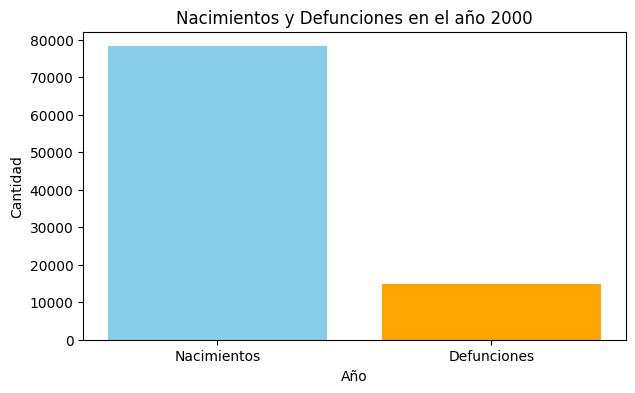

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
anio_filtrar = int(input('Ingrese el año a Graficar: '))



df_rango_anios = df[df['Año'] == anio_filtrar ]

#plt.bar(['Nacimientos','Defunciones'],df_rango_anios[['Nacimientos'].values[0],df_rango_anios[['Defunciones'].values[0]]])
plt.bar(['Nacimientos','Defunciones'], [df_rango_anios['Nacimientos'].values[0],df_rango_anios['Defunciones'].values[0]],color=['skyblue','orange'])
plt.title(f"Nacimientos y Defunciones en el año {df_rango_anios['Año'].values[0]}")
plt.ylabel('Cantidad')

plt.show



In [22]:
import matplotlib.pyplot as plt

anio_inicial = int(input('Ingrese el año inicial: '))
anio_final = int(input('Ingrese el año final: '))

df_filtrado = df[(df['Año'] >= anio_inicial) & (df['Año'] <= anio_final)]

print(df_filtrado)


     Año  Nacimientos  Defunciones  Saldo poblacional
70  2020        57848        26205              31643
71  2021        54288        31093              23195


### **Gráfico de barras: Comparación de nacimientos y defunciones**

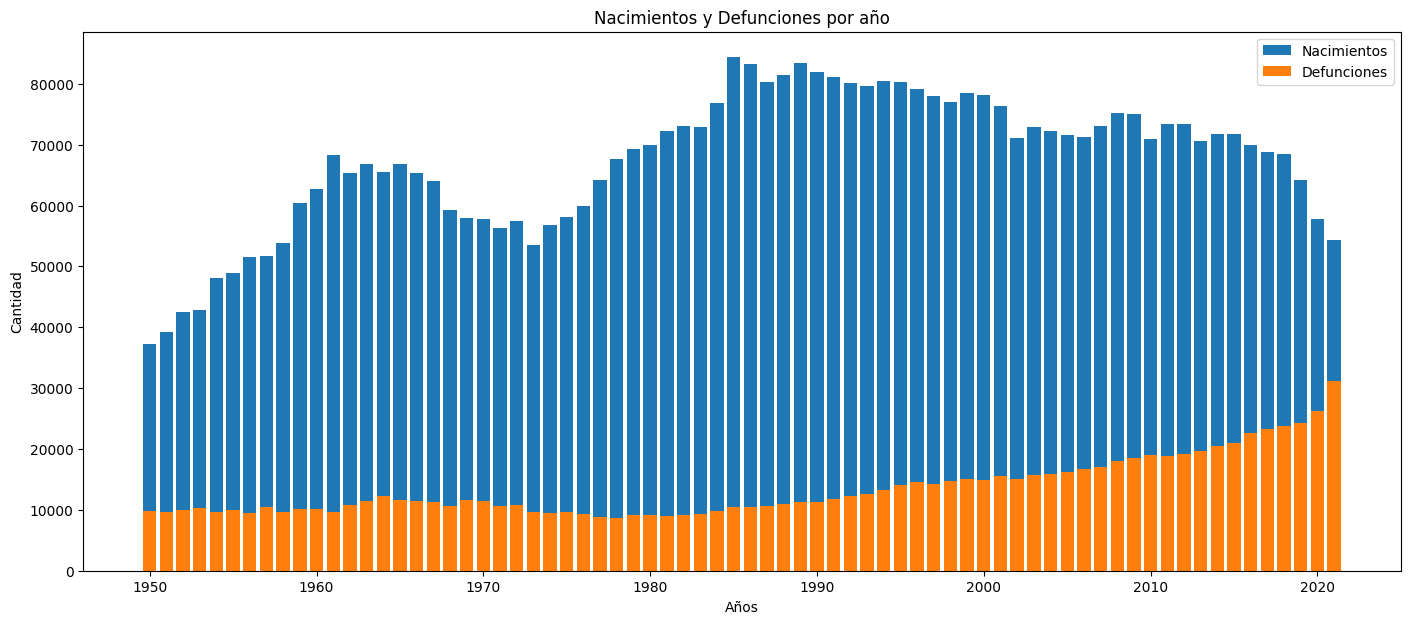

In [42]:
# Crear gráfico de barras
plt.figure(figsize=(17,7))
plt.bar(df['Año'],df['Nacimientos'],label='Nacimientos')
plt.bar(df['Año'],df['Defunciones'],label='Defunciones')
plt.title('Nacimientos y Defunciones por año')
plt.xlabel('Años')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

In [ ]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio
# Crear gráfico de barras


,Año,Nacimientos,Defunciones,Saldo poblacional
71,2021,54288,31093,23195


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [54]:
#df_rango_anios = df[df['Año'] == anio_filtrar ]

#df_filtrado = df[df['Año']>=2000 ]

df_filtrado = df[(df['Año'] >= 2010) & (df['Año'] <= 2021)]

df_filtrado.head()


,Año,Nacimientos,Defunciones,Saldo poblacional
60,2010,70922,19077,51845
61,2011,73459,18801,54658
62,2012,73326,19200,54126
63,2013,70550,19646,50904
64,2014,71793,20560,51233


2. **Calcular promedios:**

In [55]:
#
prom_nac = df_filtrado['Nacimientos'].mean()

prom_def = df_filtrado['Defunciones'].mean()

print(f"El promedio de nacimientos es: {prom_nac:,.2f}")
print(f"El promedio de defunciones es: {prom_def:,.2f}")



El promedio de nacimientos es: 67,961.92
El promedio de defunciones es: 22,463.75


3. **Graficar:**

C:\Users\Karla Salazar\AppData\Local\Temp\ipykernel_1960\4031758311.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


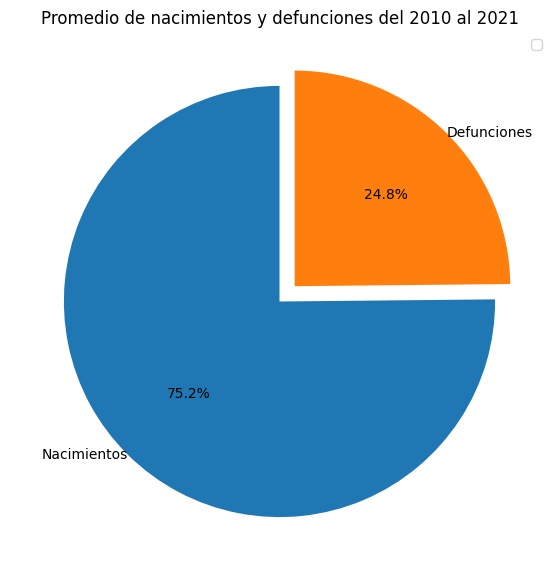

In [65]:
#

eje_x = ['Nacimientos','Defunciones']
data = [prom_nac,prom_def]
color = ['skyblue','red']
plt.title('Promedio de nacimientos y defunciones del 2010 al 2021')
plt.legend()

plt.pie(x=data,labels=eje_x,labeldistance=1,explode=[0,0.1],autopct='%1.1f%%',startangle=90)
plt.show()